In [1]:
%load_ext autoreload
%autoreload 2

### Import Dependencies

In [2]:
import pandas as pd
import numpy as np

### Import Raw Dataset

In [3]:
raw_dataset = pd.read_csv('../data/raw/raw_dataset.csv')

In [4]:
raw_dataset.head(5)

,SMS_id,SMS
0,1,"\tGo until jurong point, crazy.. Available on..."
1,2,\tOk lar... Joking wif u oni...\n
2,3,\tFree entry in 2 a wkly comp to win FA Cup f...
3,4,\tU dun say so early hor... U c already then ...
4,5,"\tNah I don't think he goes to usf, he lives ..."


In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
SMS_id    5574 non-null int64
SMS       5574 non-null object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
raw_dataset = raw_dataset.rename(columns={"SMS_id": "id","SMS":"sms"})

In [7]:
raw_dataset.head(5)

,id,sms
0,1,"\tGo until jurong point, crazy.. Available on..."
1,2,\tOk lar... Joking wif u oni...\n
2,3,\tFree entry in 2 a wkly comp to win FA Cup f...
3,4,\tU dun say so early hor... U c already then ...
4,5,"\tNah I don't think he goes to usf, he lives ..."


In [8]:
raw_dataset = raw_dataset.drop(['id'],axis=1,inplace=False)
raw_dataset.head(5)

,sms
0,"\tGo until jurong point, crazy.. Available on..."
1,\tOk lar... Joking wif u oni...\n
2,\tFree entry in 2 a wkly comp to win FA Cup f...
3,\tU dun say so early hor... U c already then ...
4,"\tNah I don't think he goes to usf, he lives ..."


In [9]:
raw_sorted = raw_dataset.sort_values(by=['sms'], ascending=False)
raw_sorted_dataset_path = '../data/interim/raw_sorted.csv'
raw_sorted.to_csv(raw_sorted_dataset_path, sep='\t', encoding='utf-8')

### Data Preprocessing

* Dedup — Remove duplicate rows in order to get unbaised results
* Removing unnecessary punctuation, tags
* Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
* Tokenization — convert sentences to words
* Stemming — words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
* Lemmatization — Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.

#### Dedup

In [10]:
#Check for duplicate rows using pandas
sms_df = raw_sorted['sms']
duplicate_rows_df = sms_df[sms_df.duplicated()]

In [11]:
print("{} duplicates found".format(len(duplicate_rows_df)))

403 duplicates found


In [12]:
#Drop all duplicates
deduped_df = raw_sorted.drop_duplicates(subset='sms', keep='first', inplace=False);
print("Removed {} duplicate rows".format(len(raw_dataset)-len(deduped_df)))
deduped_dataset_path = '../data/interim/deduped.csv'
deduped_df.to_csv(deduped_dataset_path, sep='\t', encoding='utf-8')

Removed 403 duplicate rows


#### Clean/Normalize words

In [13]:
from src.functions import preprocessor
cleaned_dataset = deduped_df['sms'].apply(preprocessor.preprocess) #preprocess will return tokenized text after cleaning 

[nltk_data] Downloading package punkt to /Users/emmanuvel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmanuvel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmanuvel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
cleaned_dataset.head(10)

[nltk_data] Downloading package punkt to /Users/emmanuvel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmanuvel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmanuvel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2792    [stayin, extra, week, back, next, wed, rugby, ...
2572                  [worry, well, finished, march, ish]
578                              [wait, sch, finish, ard]
1665                                                [fan]
4788                             [thk, wat, eat, tonight]
4510                      [takin, linear, algebra, today]
5167                           [still, got, lessons, sch]
2886                            [still, attending, talks]
206     [say, like, dat, dun, buy, ericsson, oso, ored...
4677                                        [ready, call]
Name: sms, dtype: object

### Feature Extraction

* The mapping of textual data to real valued vectors is called feature extraction.
* One of the simplest techniques to numerically represent text is BAG OF WORDS (BOW).
* We make the list of unique words in the text corpus called vocabulary. Then we can represent each sentence or    document as a vector with each word represented as 1 for present and 0 for absent from the vocabulary

In [15]:
# Generate Bag Of Words
from src.functions import bag_of_words
vocabulary, vectorized_list = bag_of_words.bow(cleaned_dataset) # bow will return a dict of vocabulary available across whole dataset

In [17]:
print(vocabulary)

{'stayin': 0, 'extra': 1, 'week': 2, 'back': 3, 'next': 4, 'wed': 5, 'rugby': 6, 'weekend': 7, 'soon': 8, 'worry': 9, 'well': 10, 'finished': 11, 'march': 12, 'ish': 13, 'wait': 14, 'sch': 15, 'finish': 16, 'ard': 17, 'fan': 18, 'thk': 19, 'wat': 20, 'eat': 21, 'tonight': 22, 'takin': 23, 'linear': 24, 'algebra': 25, 'today': 26, 'still': 27, 'got': 28, 'lessons': 29, 'attending': 30, 'talks': 31, 'say': 32, 'like': 33, 'dat': 34, 'dun': 35, 'buy': 36, 'ericsson': 37, 'oso': 38, 'oredi': 39, 'lar': 40, 'ready': 41, 'call': 42, 'predict': 43, 'time': 44, 'ull': 45, 'buying': 46, 'send': 47, 'contents': 48, 'page': 49, 'home': 50, 'work': 51, 'meh': 52, 'neva': 53, 'tell': 54, 'noe': 55, 'aft': 56, 'mean': 57, 'confirmed': 58, 'tot': 59, 'juz': 60, 'oni': 61, 'log': 62, 'sdrybi': 63, 'need': 64, 'come': 65, 'liao': 66, 'ask': 67, 'dad': 68, 'pick': 69, 'give': 70, 'walk': 71, 'eatin': 72, 'later': 73, 'wif': 74, 'frens': 75, 'lei': 76, 'going': 77, 'first': 78, 'wan': 79, 'watch': 80, 'i

In [44]:
# Get frequency of each word in the vocabulary for feature engineering
from src.functions import feature_selection
frequency_distribution = feature_selection.get_word_frequency(vectorized_list)

Calculate frequencies of each word in the vocabulary...
Finished calculating frequency distribution...


In [45]:
print(frequency_distribution)

{0: 2, 1: 11, 2: 100, 3: 146, 4: 62, 5: 8, 6: 1, 7: 30, 8: 66, 9: 22, 10: 131, 11: 19, 12: 12, 13: 12, 14: 58, 15: 22, 16: 42, 17: 21, 18: 2, 19: 50, 20: 92, 21: 38, 22: 60, 23: 4, 24: 1, 25: 1, 26: 129, 27: 147, 28: 245, 29: 9, 30: 1, 31: 2, 32: 83, 33: 232, 34: 34, 35: 55, 36: 60, 37: 2, 38: 23, 39: 15, 40: 38, 41: 39, 42: 492, 43: 1, 44: 204, 45: 8, 46: 9, 47: 166, 48: 3, 49: 7, 50: 153, 51: 87, 52: 9, 53: 18, 54: 127, 55: 20, 56: 19, 57: 20, 58: 3, 59: 21, 60: 25, 61: 4, 62: 13, 63: 1, 64: 163, 65: 213, 66: 35, 67: 87, 68: 28, 69: 60, 70: 103, 71: 19, 72: 7, 73: 99, 74: 27, 75: 9, 76: 23, 77: 245, 78: 58, 79: 55, 80: 32, 81: 4, 82: 2, 83: 11, 84: 6, 85: 10, 86: 3, 87: 11, 88: 1, 89: 3, 90: 7, 91: 29, 92: 1, 93: 1, 94: 76, 95: 5, 96: 8, 97: 28, 98: 31, 99: 121, 100: 3, 101: 3, 102: 32, 103: 83, 104: 30, 105: 2, 106: 17, 107: 6, 108: 86, 109: 19, 110: 70, 111: 60, 112: 14, 113: 1, 114: 43, 115: 2, 116: 11, 117: 27, 118: 1, 119: 2, 120: 95, 121: 239, 122: 87, 123: 5, 124: 6, 125: 14, 

In [46]:
# Retrieve top words in the vocabulary (threshold_value is used for band pass filtering, ie to remove low frequency words)
threshold_value = 12
top_words=feature_selection.get_top_words(frequency_distribution, threshold_value) # get_top_words returns a dict top words with key-> new index, value -> index of word in the vocabulary
print(top_words)
print(len(top_words))
print(len(frequency_distribution))

{0: 2, 1: 3, 2: 4, 3: 7, 4: 8, 5: 9, 6: 10, 7: 11, 8: 14, 9: 15, 10: 16, 11: 17, 12: 19, 13: 20, 14: 21, 15: 22, 16: 26, 17: 27, 18: 28, 19: 32, 20: 33, 21: 34, 22: 35, 23: 36, 24: 38, 25: 39, 26: 40, 27: 41, 28: 42, 29: 44, 30: 47, 31: 50, 32: 51, 33: 53, 34: 54, 35: 55, 36: 56, 37: 57, 38: 59, 39: 60, 40: 62, 41: 64, 42: 65, 43: 66, 44: 67, 45: 68, 46: 69, 47: 70, 48: 71, 49: 73, 50: 74, 51: 76, 52: 77, 53: 78, 54: 79, 55: 80, 56: 91, 57: 94, 58: 97, 59: 98, 60: 99, 61: 102, 62: 103, 63: 104, 64: 106, 65: 108, 66: 109, 67: 110, 68: 111, 69: 112, 70: 114, 71: 117, 72: 120, 73: 121, 74: 122, 75: 125, 76: 126, 77: 127, 78: 129, 79: 130, 80: 132, 81: 133, 82: 138, 83: 141, 84: 144, 85: 145, 86: 147, 87: 152, 88: 161, 89: 168, 90: 169, 91: 170, 92: 171, 93: 173, 94: 174, 95: 175, 96: 177, 97: 178, 98: 179, 99: 180, 100: 183, 101: 184, 102: 186, 103: 187, 104: 189, 105: 191, 106: 192, 107: 196, 108: 197, 109: 202, 110: 204, 111: 206, 112: 208, 113: 211, 114: 213, 115: 214, 116: 218, 117: 2

In [47]:
# Create a dic of top words and their frequency distribution to visualize using wordcloud
word_freq = {}
for value in top_words.values():
    key = feature_selection.get_key(vocabulary,value)
    word_freq[key] = frequency_distribution[value]
print(word_freq)    

{'week': 100, 'back': 146, 'next': 62, 'weekend': 30, 'soon': 66, 'worry': 22, 'well': 131, 'finished': 19, 'wait': 58, 'sch': 22, 'finish': 42, 'ard': 21, 'thk': 50, 'wat': 92, 'eat': 38, 'tonight': 60, 'today': 129, 'still': 147, 'got': 245, 'say': 83, 'like': 232, 'dat': 34, 'dun': 55, 'buy': 60, 'oso': 23, 'oredi': 15, 'lar': 38, 'ready': 39, 'call': 492, 'time': 204, 'send': 166, 'home': 153, 'work': 87, 'neva': 18, 'tell': 127, 'noe': 20, 'aft': 19, 'mean': 20, 'tot': 21, 'juz': 25, 'log': 13, 'need': 163, 'come': 213, 'liao': 35, 'ask': 87, 'dad': 28, 'pick': 60, 'give': 103, 'walk': 19, 'later': 99, 'wif': 27, 'lei': 23, 'going': 245, 'first': 58, 'wan': 55, 'watch': 32, 'called': 29, 'cos': 76, 'sweet': 28, 'princess': 31, 'please': 121, 'bed': 32, 'yes': 83, 'baby': 30, 'open': 17, 'yeah': 86, 'thinking': 19, 'sure': 70, 'thing': 60, 'mate': 14, 'stuff': 43, 'anyway': 27, 'way': 95, 'know': 239, 'number': 87, 'finally': 14, 'lol': 73, 'missed': 23, 'trip': 20, 'last': 73, 'ri

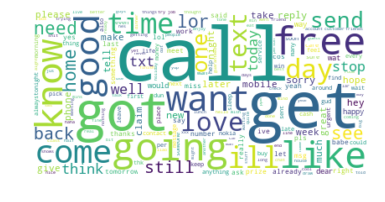

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [49]:
wordcloud.to_file("../reports/figures/word_count.png")

In [50]:
max(word_freq, key=word_freq.get)

'call'

In [43]:
sorted_d = sorted(word_freq.items(), key=lambda x: x[1])
print(sorted_d)

[('log', 13), ('winner', 13), ('gas', 13), ('dreams', 13), ('mobileupd', 13), ('post', 13), ('cut', 13), ('hee', 13), ('mah', 13), ('earlier', 13), ('mayb', 13), ('download', 13), ('point', 13), ('project', 13), ('caller', 13), ('almost', 13), ('hold', 13), ('couple', 13), ('yar', 13), ('fast', 13), ('wats', 13), ('knw', 13), ('ltd', 13), ('pmsg', 13), ('muz', 13), ('vouchers', 13), ('course', 13), ('yrs', 13), ('talking', 13), ('side', 13), ('area', 13), ('congrats', 13), ('saturday', 13), ('luck', 13), ('lost', 13), ('read', 13), ('friday', 13), ('goodmorning', 13), ('friendship', 13), ('congratulations', 13), ('mate', 14), ('finally', 14), ('search', 14), ('meant', 14), ('coz', 14), ('games', 14), ('news', 14), ('frnd', 14), ('hard', 14), ('darlin', 14), ('decided', 14), ('hungry', 14), ('credit', 14), ('available', 14), ('bank', 14), ('whole', 14), ('takes', 14), ('snow', 14), ('party', 14), ('unlimited', 14), ('telling', 14), ('prob', 14), ('wife', 14), ('months', 14), ('okie', 14